In [131]:
import requests
import pandas as pd
import numpy as np
import 

In [63]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
json = response.json()

In [135]:
matches_url = 'https://api.football-data.org/v2/competitions/PL/matches'
response = requests.get(url)
matches_json = response.json()

print(matches_json)

KeyError: 'short_name'

In [64]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

useful_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

useful_elements_df['position'] = useful_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
useful_elements_df['team'] = useful_elements_df.team.map(teams_df.set_index('id').name)
useful_elements_df['value'] = useful_elements_df.value_season.astype(float)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [121]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,pulse_id,...,strength,strength_attack_away,strength_attack_home,strength_defence_away,strength_defence_home,strength_overall_away,strength_overall_home,team_division,unavailable,win
0,3,0,None,1,0,Arsenal,0,0,0,1,...,4,1200,1190,1270,1160,1270,1190,None,False,0
1,7,0,None,2,0,Aston Villa,0,0,0,2,...,2,1080,1010,1110,1000,1080,1050,None,False,0
2,36,0,None,3,0,Brighton,0,0,0,131,...,2,1130,1100,1060,1060,1070,1070,None,False,0
3,90,0,None,4,0,Burnley,0,0,0,43,...,3,1240,1130,1170,1050,1150,1140,None,False,0
4,8,0,None,5,0,Chelsea,0,0,0,4,...,4,1270,1140,1250,1240,1260,1200,None,False,0


In [46]:
# VALUE SECTION
# Players sorted accoring to value, where VALUE = POINTS / COST

In [102]:
useful_elements_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
96,Pope,Burnley,1,25.1,55,3420,0,30.9,170,Goalkeeper,30.9
70,Ryan,Brighton,1,23.9,45,3420,0,30.0,135,Goalkeeper,30.0
306,Henderson,Man Utd,1,5.2,55,3240,0,29.1,160,Goalkeeper,29.1
327,Dubravka,Newcastle,1,4.6,50,3420,0,28.6,143,Goalkeeper,28.6
195,Schmeichel,Leicester,1,10.9,55,3420,0,28.4,156,Goalkeeper,28.4
260,Alexander-Arnold,Liverpool,2,56.5,75,3173,0,28.0,210,Defender,28.0
462,dos Santos Patrício,Wolves,1,6.6,55,3420,0,27.8,153,Goalkeeper,27.8
464,Doherty,Wolves,2,22.4,60,2836,0,27.8,167,Defender,27.8
128,Guaita,Crystal Palace,1,1.3,50,3150,0,27.4,137,Goalkeeper,27.4
251,van Dijk,Liverpool,2,23.2,65,3420,0,27.4,178,Defender,27.4


In [66]:
fwd_df = useful_elements_df.loc[useful_elements_df.position == 'Forward']
mid_df = useful_elements_df.loc[useful_elements_df.position == 'Midfielder']
def_df = useful_elements_df.loc[useful_elements_df.position == 'Defender']
goal_df = useful_elements_df.loc[useful_elements_df.position == 'Goalkeeper']

In [77]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
96,Pope,Burnley,1,25.1,55,3420,0,30.9,170,Goalkeeper,30.9
70,Ryan,Brighton,1,23.9,45,3420,0,30.0,135,Goalkeeper,30.0
306,Henderson,Man Utd,1,5.2,55,3240,0,29.1,160,Goalkeeper,29.1
327,Dubravka,Newcastle,1,4.6,50,3420,0,28.6,143,Goalkeeper,28.6
195,Schmeichel,Leicester,1,10.9,55,3420,0,28.4,156,Goalkeeper,28.4
462,dos Santos Patrício,Wolves,1,6.6,55,3420,0,27.8,153,Goalkeeper,27.8
128,Guaita,Crystal Palace,1,1.3,50,3150,0,27.4,137,Goalkeeper,27.4
292,de Gea,Man Utd,1,3.9,55,3420,0,26.0,143,Goalkeeper,26.0
364,Ramsdale,Sheffield Utd,1,5.6,50,3330,0,25.2,126,Goalkeeper,25.2
157,Pickford,Everton,1,3.2,50,3420,0,23.4,117,Goalkeeper,23.4


In [118]:
def_df.sort_values('value',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
260,Alexander-Arnold,Liverpool,2,56.5,75,3173,0,28.0,210,Defender,28.0
464,Doherty,Wolves,2,22.4,60,2836,0,27.8,167,Defender,27.8
251,van Dijk,Liverpool,2,23.2,65,3420,0,27.4,178,Defender,27.4
355,Egan,Sheffield Utd,2,17.9,50,3187,0,26.6,133,Defender,26.6
81,Tarkowski,Burnley,2,8.0,55,3420,0,26.0,143,Defender,26.0
256,Robertson,Liverpool,2,11.3,70,3111,0,25.9,181,Defender,25.9
349,Stevens,Sheffield Utd,2,5.9,55,3345,0,25.8,142,Defender,25.8
353,Baldock,Sheffield Utd,2,5.9,55,3420,0,25.8,142,Defender,25.8
62,Dunk,Brighton,2,11.1,50,3230,0,25.6,128,Defender,25.6
347,Basham,Sheffield Utd,2,2.7,50,3242,0,24.6,123,Defender,24.6


In [111]:
def_df.sort_values('total_points',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
260,Alexander-Arnold,Liverpool,2,56.5,75,3173,0,28.0,210,Defender,28.0
256,Robertson,Liverpool,2,11.3,70,3111,0,25.9,181,Defender,25.9
251,van Dijk,Liverpool,2,23.2,65,3420,0,27.4,178,Defender,27.4
464,Doherty,Wolves,2,22.4,60,2836,0,27.8,167,Defender,27.8
81,Tarkowski,Burnley,2,8.0,55,3420,0,26.0,143,Defender,26.0
353,Baldock,Sheffield Utd,2,5.9,55,3420,0,25.8,142,Defender,25.8
349,Stevens,Sheffield Utd,2,5.9,55,3345,0,25.8,142,Defender,25.8
355,Egan,Sheffield Utd,2,17.9,50,3187,0,26.6,133,Defender,26.6
102,Azpilicueta,Chelsea,2,7.5,60,3229,0,21.7,130,Defender,21.7
197,Evans,Leicester,2,0.1,55,3384,0,23.3,128,Defender,23.3


In [115]:
mid_df.sort_values('value',ascending=False).head(50)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
357,Lundstram,Sheffield Utd,3,12.6,55,2452,0,26.2,144,Midfielder,26.2
273,De Bruyne,Man City,3,40.6,115,2790,0,21.8,251,Midfielder,21.8
89,Westwood,Burnley,3,1.5,55,3150,0,21.5,118,Midfielder,21.5
37,Grealish,Aston Villa,3,11.4,70,3233,0,21.3,149,Midfielder,21.3
245,Henderson,Liverpool,3,4.8,55,2234,0,21.1,116,Midfielder,21.1
434,Noble,West Ham,3,2.0,50,2675,0,21.0,105,Midfielder,21.0
27,Borges Da Silva,Arsenal,3,8.5,80,2595,0,21.0,168,Midfielder,21.0
455,Rice,West Ham,3,4.8,50,3420,0,21.0,105,Midfielder,21.0
276,Mahrez,Man City,3,2.9,85,1934,0,20.6,175,Midfielder,20.6
461,Santos Moutinho,Wolves,3,2.5,55,3105,0,20.5,113,Midfielder,20.5


In [117]:
mid_df.sort_values('total_points',ascending=False).head(60)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
273,De Bruyne,Man City,3,40.6,115,2790,0,21.8,251,Midfielder,21.8
255,Salah,Liverpool,3,32.9,120,2879,0,19.4,233,Midfielder,19.4
252,Mané,Liverpool,3,11.9,120,2745,0,18.4,221,Midfielder,18.4
3,Aubameyang,Arsenal,3,34.7,120,3136,0,17.1,205,Midfielder,17.1
277,Sterling,Man City,3,5.2,115,2651,0,17.7,204,Midfielder,17.7
307,Rashford,Man Utd,3,6.8,95,2645,0,18.6,177,Midfielder,18.6
276,Mahrez,Man City,3,2.9,85,1934,0,20.6,175,Midfielder,20.6
395,Son,Spurs,3,23.7,90,2478,0,18.8,169,Midfielder,18.8
27,Borges Da Silva,Arsenal,3,8.5,80,2595,0,21.0,168,Midfielder,21.0
37,Grealish,Aston Villa,3,11.4,70,3233,0,21.3,149,Midfielder,21.3


In [107]:
fwd_df.sort_values('value',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
370,Ings,Southampton,4,24.5,85,2800,0,23.3,198,Forward,23.3
467,Jiménez,Wolves,4,22.2,85,3241,0,22.8,194,Forward,22.8
304,Martial,Man Utd,4,20.6,90,2625,0,22.2,200,Forward,22.2
140,Ayew,Crystal Palace,4,6.7,60,3148,0,22.0,132,Forward,22.0
202,Vardy,Leicester,4,14.5,100,3032,0,21.0,210,Forward,21.0
91,Wood,Burnley,4,4.5,65,2436,0,20.9,136,Forward,20.9
166,de Andrade,Everton,4,10.8,80,3070,0,20.6,165,Forward,20.6
118,Abraham,Chelsea,4,7.2,75,2206,0,20.4,153,Forward,20.4
68,Maupay,Brighton,4,2.6,65,2763,0,20.2,131,Forward,20.2
164,Calvert-Lewin,Everton,4,5.0,70,2621,0,18.0,126,Forward,18.0


In [106]:
fwd_df.sort_values('total_points',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
202,Vardy,Leicester,4,14.5,100,3032,0,21.0,210,Forward,21.0
304,Martial,Man Utd,4,20.6,90,2625,0,22.2,200,Forward,22.2
370,Ings,Southampton,4,24.5,85,2800,0,23.3,198,Forward,23.3
467,Jiménez,Wolves,4,22.2,85,3241,0,22.8,194,Forward,22.8
166,de Andrade,Everton,4,10.8,80,3070,0,20.6,165,Forward,20.6
393,Kane,Spurs,4,15.9,105,2588,0,15.0,158,Forward,15.0
250,Firmino,Liverpool,4,3.5,95,2985,0,16.3,155,Forward,16.3
118,Abraham,Chelsea,4,7.2,75,2206,0,20.4,153,Forward,20.4
283,de Jesus,Man City,4,2.5,95,2018,0,15.4,146,Forward,15.4
91,Wood,Burnley,4,4.5,65,2436,0,20.9,136,Forward,20.9


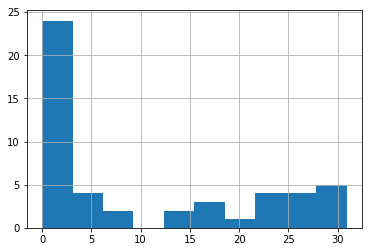

In [81]:
goal_df.value.hist()

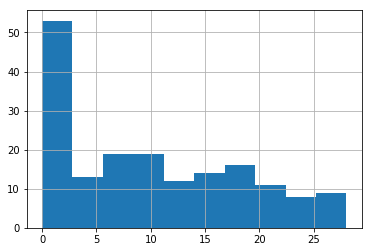

In [82]:
def_df.value.hist()

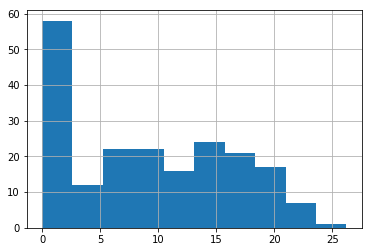

In [83]:
mid_df.value.hist()

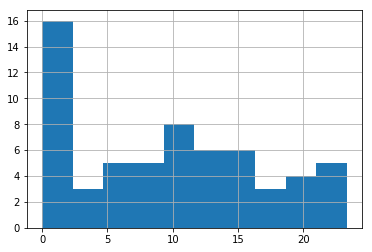

In [84]:
fwd_df.value.hist()

SyntaxError: invalid syntax (<ipython-input-90-16e0441ebf7b>, line 10)

In [92]:
# TOTAL POINTS

In [99]:
mid_df.sort_values('total_points',ascending=False).head(30)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
273,De Bruyne,Man City,3,40.6,115,2790,0,21.8,251,Midfielder,21.8
255,Salah,Liverpool,3,32.9,120,2879,0,19.4,233,Midfielder,19.4
252,Mané,Liverpool,3,11.9,120,2745,0,18.4,221,Midfielder,18.4
3,Aubameyang,Arsenal,3,34.7,120,3136,0,17.1,205,Midfielder,17.1
277,Sterling,Man City,3,5.2,115,2651,0,17.7,204,Midfielder,17.7
307,Rashford,Man Utd,3,6.8,95,2645,0,18.6,177,Midfielder,18.6
276,Mahrez,Man City,3,2.9,85,1934,0,20.6,175,Midfielder,20.6
395,Son,Spurs,3,23.7,90,2478,0,18.8,169,Midfielder,18.8
27,Borges Da Silva,Arsenal,3,8.5,80,2595,0,21.0,168,Midfielder,21.0
37,Grealish,Aston Villa,3,11.4,70,3233,0,21.3,149,Midfielder,21.3
